<h1>Honors Assignment Fashion-MNIST Project</h1>

##### BY Shrish MISHRA

## Objective

In this project, I will train a Convolutional Neural Network to recognize images from fashion MNIST. I'll be trying to achieve at least 85% accuracy on the validation data .

<h2>Table of Contents</h2>


<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</li>
<li><a href="#Train">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 

</ul>

<hr>

<h2 id="Preparation" >Preparation</h2>

Downloading the datasets.

In [1]:
!pip install torch
!pip install torchvision

     |████████████████████████████████| 12.7 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 776.7 MB 7.2 kB/s  eta 0:00:01█▎                    | 274.8 MB 62.4 MB/s eta 0:00:09     |████████████████████████▋       | 598.7 MB 64.9 MB/s eta 0:00:03
  Attempting uninstall: torch
    Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


In [2]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules 

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<h2 id="Questions 1">Questions 1: Create a Dataset Class</h2>

In this section, I will load a Dataset object, but first transform the dataset using the the <code>Compose</code> function to perform the following transforms:. 
<ol>
    <li>use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

In [20]:
#Hint:

IMAGE_SIZE = 16
# transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Creating two dataset objects for the Fashion MNIST  dataset. One for training data called <code> trainset </code> and one for validation data <code>testset</code>.

In [7]:
import torchvision as torchvision
#transforming the PIL Image to tensors
trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = composed)
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = composed)

#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
#loading the test data from testset
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


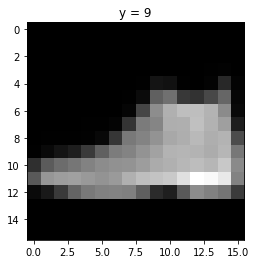

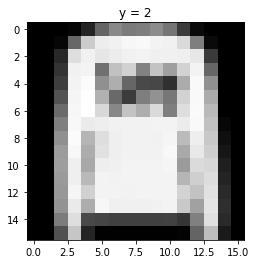

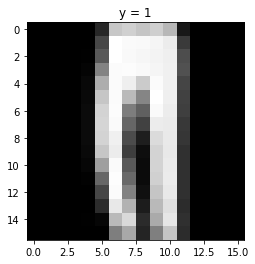

In [8]:
for n,data_sample in enumerate(testset):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

<h2 id="Q2">Questions 2</h2>
Creating a Convolutional Neural Network class.

Constructor  for regular Convolutional Neural Network

In [10]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=100 )

Convolutional Neural Network object 

In [12]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)

Creating the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Making the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss

In [14]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=5000)

Code used to train the model 

In [18]:
%%time
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(testset)
n_epochs=10
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

CPU times: user 4min 29s, sys: 4.01 s, total: 4min 33s
Wall time: 2min 13s


Plotting the Cost and accuracy for each epoch for the training and testing data, respectively. 

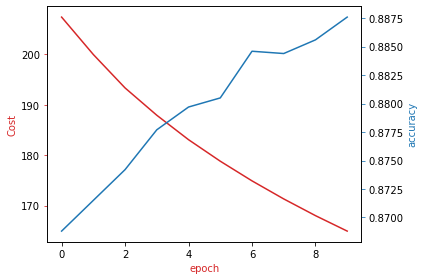

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## THE END